In [1]:
import pandas as pd
import fnmatch
import cv2
import numpy as np
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.utils import to_categorical
import pickle
import time
import keras
from sklearn.model_selection import train_test_split

In [2]:
Lab_tested_data = pd.read_csv('C:\\Users\\Mahmood Yousaf\\Desktop\\FYP\\Final-Year-Project-Soil-Analysis-using-machine-learning\\Soil_Lab_Results - Sheet1.csv')
Lab_tested_data = Lab_tested_data.fillna(method='ffill')
Lab_tested_data.to_csv("Pre_processed_lab_tested_data.csv")

In [3]:
Sample_ID = Lab_tested_data.iloc[:,0]
P_Value = Lab_tested_data.iloc[:,5]

In [4]:
def load_images_from_folder(folder):
    Labels = []
    for filename in os.listdir(folder):
        x = filename.split("_")
        id = float(x[0])
        img = cv2.imread(os.path.join(folder,filename))
        img = img[800:1100,800:1100]
        kernel = np.array([[-1,-1,-1], 
                   [-1, 9,-1],
                   [-1,-1,-1]])
        img = cv2.filter2D(img, -1, kernel) # applying the sharpening kernel.
        Result = Sample_ID.isin([id])
        Result = Sample_ID[Result];
        if len(Result) >= 1:
            if len(Result) > 1:  
                Result = Sample_ID[Sample_ID==Result.iloc[1]].index.tolist()
                Id_1_index = Result[0]
                Id_2_index = Result[1]
                print(id)
                Labels.append([filename,img,(P_Value[Id_1_index]+P_Value[Id_2_index])/2])
            else:
                Result = Sample_ID[Sample_ID==Result.iloc[1]].index.tolist()
                Id_1_index = Result[0]
                print(id)
                Labels.append([filename,img,(P_Value[Id_1_index])])
        else:
            print(len(Result))
            continue
    return Labels

In [5]:
dataset = load_images_from_folder('C:\\Users\\Mahmood Yousaf\\Desktop\\FYP\\Dataset RGB\\testing_data')

110638.0
110638.0
110639.0
110639.0
110640.0
110640.0
110641.0
110641.0
110642.0
110642.0
110643.0
110643.0
110644.0
110644.0
110645.0
110645.0
110646.0
110646.0
110648.0
110648.0
110649.0
110649.0
110650.0
110650.0
110651.0
110651.0
110652.0
110652.0
110653.0
110653.0
110654.0
110654.0
110655.0
110655.0
110656.0
110656.0
110657.0
110657.0
110658.0
110658.0
110659.0
110659.0
110660.0
110660.0
110661.0
110661.0
110662.0
110662.0
110663.0
110663.0
110664.0
110664.0
110665.0
110665.0
110667.0
110667.0
110734.0
110734.0
110735.0
110735.0
110736.0
110736.0
110737.0
110737.0
110738.0
110738.0
110740.0
110740.0
110745.0
110745.0
110746.0
110746.0
110747.0
110747.0
110749.0
110749.0
110750.0
110750.0
110752.0
110752.0
110753.0
110753.0
110755.0
110755.0
110756.0
110756.0
110757.0
110757.0
110759.0
110759.0
110760.0
110760.0
110761.0
110761.0
110762.0
110762.0
110763.0
110763.0
110766.0
110766.0
110767.0
110767.0
110768.0
110768.0
110773.0
110773.0
110775.0
110775.0
110776.0
110776.0
110777.0
1

In [6]:
X = []
Y = []
for data in dataset:
    X.append(data[1])
    Y.append(data[2])
print(Y)

[5.4, 5.4, 4.9, 4.9, 4.199999999999999, 4.199999999999999, 5.15, 5.15, 5.300000000000001, 5.300000000000001, 4.300000000000001, 4.300000000000001, 4.95, 4.95, 4.55, 4.55, 4.35, 4.35, 4.15, 4.15, 4.1, 4.1, 5.05, 5.05, 5.15, 5.15, 3.75, 3.75, 4.35, 4.35, 4.05, 4.05, 4.15, 4.15, 4.1, 4.1, 5.1, 5.1, 4.1, 4.1, 3.8499999999999996, 3.8499999999999996, 5.15, 5.15, 3.45, 3.45, 4.45, 4.45, 3.15, 3.15, 4.449999999999999, 4.449999999999999, 4.55, 4.55, 4.25, 4.25, 4.699999999999999, 4.699999999999999, 4.1, 4.1, 4.35, 4.35, 4.449999999999999, 4.449999999999999, 4.0, 4.0, 3.35, 3.35, 5.1, 5.1, 4.6, 4.6, 4.300000000000001, 4.300000000000001, 5.75, 5.75, 4.55, 4.55, 5.05, 5.05, 6.6, 6.6, 4.55, 4.55, 4.6, 4.6, 4.4, 4.4, 4.35, 4.35, 4.35, 4.35, 5.2, 5.2, 4.05, 4.05, 3.8, 3.8, 3.35, 3.35, 4.65, 4.65, 5.3, 5.3, 3.95, 3.95, 5.15, 5.15, 4.35, 4.35, 4.949999999999999, 4.949999999999999, 4.300000000000001, 4.300000000000001, 4.25, 4.25, 4.35, 4.35, 4.6, 4.6, 5.65, 5.65, 4.65, 4.65, 4.1, 4.1, 4.4, 4.4, 5.35, 5

In [7]:
img_size = 300
X = np.array(X).reshape(-1, img_size, img_size, 3)
print(X[0].shape)
Y = np.array(Y)
print(Y)

(300, 300, 3)
[ 5.4   5.4   4.9   4.9   4.2   4.2   5.15  5.15  5.3   5.3   4.3   4.3
  4.95  4.95  4.55  4.55  4.35  4.35  4.15  4.15  4.1   4.1   5.05  5.05
  5.15  5.15  3.75  3.75  4.35  4.35  4.05  4.05  4.15  4.15  4.1   4.1
  5.1   5.1   4.1   4.1   3.85  3.85  5.15  5.15  3.45  3.45  4.45  4.45
  3.15  3.15  4.45  4.45  4.55  4.55  4.25  4.25  4.7   4.7   4.1   4.1
  4.35  4.35  4.45  4.45  4.    4.    3.35  3.35  5.1   5.1   4.6   4.6
  4.3   4.3   5.75  5.75  4.55  4.55  5.05  5.05  6.6   6.6   4.55  4.55
  4.6   4.6   4.4   4.4   4.35  4.35  4.35  4.35  5.2   5.2   4.05  4.05
  3.8   3.8   3.35  3.35  4.65  4.65  5.3   5.3   3.95  3.95  5.15  5.15
  4.35  4.35  4.95  4.95  4.3   4.3   4.25  4.25  4.35  4.35  4.6   4.6
  5.65  5.65  4.65  4.65  4.1   4.1   4.4   4.4   5.35  5.35  4.5   4.5
  3.25  3.25  4.15  4.15  4.05  4.05  4.    4.    5.95  5.95  4.9   4.9
  8.65  8.65  7.45  7.45  5.15  5.15  5.15  5.15  6.5   6.5   4.3   4.3
  6.4   6.4   5.4   5.4   4.2   4.2   3.7   3

In [8]:
len(X)

701

In [9]:
#AlexNet Architecture for P estimation
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(300,300,3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='linear')
])

In [10]:
X_train, X_val, y_train, y_val = train_test_split(X, Y)
print(X_train.shape)

(525, 300, 300, 3)


In [11]:
model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])
history=model.fit(X_train, y_train, epochs=300, batch_size=32, verbose=1, validation_split=0.4)
predictions = model.predict(X_val)

Epoch 1/300
10/10 [==============================] - 11s 633ms/step - loss: 39135.4844 - mse: 39135.4844 - mae: 80.4013 - val_loss: 983616640.0000 - val_mse: 983616640.0000 - val_mae: 30925.8086
Epoch 2/300
10/10 [==============================] - 2s 193ms/step - loss: 566.3678 - mse: 566.3678 - mae: 14.6312 - val_loss: 613566.0000 - val_mse: 613566.0000 - val_mae: 763.8745
Epoch 3/300
10/10 [==============================] - 2s 192ms/step - loss: 427.8490 - mse: 427.8490 - mae: 12.5717 - val_loss: 91879.7656 - val_mse: 91879.7656 - val_mae: 286.3428
Epoch 4/300
10/10 [==============================] - 2s 193ms/step - loss: 125.2608 - mse: 125.2608 - mae: 7.2661 - val_loss: 1088500.1250 - val_mse: 1088500.1250 - val_mae: 1015.9080
Epoch 5/300
10/10 [==============================] - 2s 195ms/step - loss: 96.2481 - mse: 96.2481 - mae: 6.4677 - val_loss: 3788.8970 - val_mse: 3788.8970 - val_mae: 48.4497
Epoch 6/300
10/10 [==============================] - 2s 203ms/step - loss: 57.7840 - 

10/10 [==============================] - 2s 194ms/step - loss: 2.1021 - mse: 2.1021 - mae: 1.1176 - val_loss: 2.8033 - val_mse: 2.8033 - val_mae: 1.2589
Epoch 50/300
10/10 [==============================] - 2s 193ms/step - loss: 2.1508 - mse: 2.1508 - mae: 1.1287 - val_loss: 2.8688 - val_mse: 2.8688 - val_mae: 1.2858
Epoch 51/300
10/10 [==============================] - 2s 194ms/step - loss: 2.2968 - mse: 2.2968 - mae: 1.1864 - val_loss: 2.5244 - val_mse: 2.5244 - val_mae: 1.1749
Epoch 52/300
10/10 [==============================] - 2s 193ms/step - loss: 2.1396 - mse: 2.1396 - mae: 1.0898 - val_loss: 2.4541 - val_mse: 2.4541 - val_mae: 1.1461
Epoch 53/300
10/10 [==============================] - 2s 193ms/step - loss: 2.4652 - mse: 2.4652 - mae: 1.1784 - val_loss: 2.5061 - val_mse: 2.5061 - val_mae: 1.1532
Epoch 54/300
10/10 [==============================] - 2s 193ms/step - loss: 2.2864 - mse: 2.2864 - mae: 1.1933 - val_loss: 2.5837 - val_mse: 2.5837 - val_mae: 1.1840
Epoch 55/300
10/1

10/10 [==============================] - 2s 195ms/step - loss: 1.6899 - mse: 1.6899 - mae: 1.0026 - val_loss: 2.1632 - val_mse: 2.1632 - val_mae: 1.0330
Epoch 99/300
10/10 [==============================] - 2s 195ms/step - loss: 1.7275 - mse: 1.7275 - mae: 1.0416 - val_loss: 2.5854 - val_mse: 2.5854 - val_mae: 1.1184
Epoch 100/300
10/10 [==============================] - 2s 196ms/step - loss: 1.7046 - mse: 1.7046 - mae: 1.0127 - val_loss: 2.3318 - val_mse: 2.3318 - val_mae: 1.0619
Epoch 101/300
10/10 [==============================] - 2s 197ms/step - loss: 1.4906 - mse: 1.4906 - mae: 0.9565 - val_loss: 2.1838 - val_mse: 2.1838 - val_mae: 1.0366
Epoch 102/300
10/10 [==============================] - 2s 200ms/step - loss: 1.4823 - mse: 1.4823 - mae: 0.9475 - val_loss: 3.3385 - val_mse: 3.3385 - val_mae: 1.3913
Epoch 103/300
10/10 [==============================] - 2s 196ms/step - loss: 1.6868 - mse: 1.6868 - mae: 1.0120 - val_loss: 2.2116 - val_mse: 2.2116 - val_mae: 1.0593
Epoch 104/300

10/10 [==============================] - 2s 195ms/step - loss: 1.2859 - mse: 1.2859 - mae: 0.9074 - val_loss: 2.7300 - val_mse: 2.7300 - val_mae: 1.1909
Epoch 148/300
10/10 [==============================] - 2s 195ms/step - loss: 1.1100 - mse: 1.1100 - mae: 0.8292 - val_loss: 2.4715 - val_mse: 2.4715 - val_mae: 1.1080
Epoch 149/300
10/10 [==============================] - 2s 195ms/step - loss: 1.5001 - mse: 1.5001 - mae: 0.9457 - val_loss: 2.2731 - val_mse: 2.2731 - val_mae: 1.0687
Epoch 150/300
10/10 [==============================] - 2s 195ms/step - loss: 1.2242 - mse: 1.2242 - mae: 0.8612 - val_loss: 2.5182 - val_mse: 2.5182 - val_mae: 1.1339
Epoch 151/300
10/10 [==============================] - 2s 195ms/step - loss: 1.3976 - mse: 1.3976 - mae: 0.9398 - val_loss: 2.4153 - val_mse: 2.4153 - val_mae: 1.1237
Epoch 152/300
10/10 [==============================] - 2s 196ms/step - loss: 1.4476 - mse: 1.4476 - mae: 0.9377 - val_loss: 2.2834 - val_mse: 2.2834 - val_mae: 1.0829
Epoch 153/30

10/10 [==============================] - 2s 195ms/step - loss: 1.0104 - mse: 1.0104 - mae: 0.7955 - val_loss: 2.6311 - val_mse: 2.6311 - val_mae: 1.2055
Epoch 197/300
10/10 [==============================] - 2s 203ms/step - loss: 1.1686 - mse: 1.1686 - mae: 0.8336 - val_loss: 2.3318 - val_mse: 2.3318 - val_mae: 1.1106
Epoch 198/300
10/10 [==============================] - 2s 208ms/step - loss: 1.3945 - mse: 1.3945 - mae: 0.9241 - val_loss: 2.3117 - val_mse: 2.3117 - val_mae: 1.1202
Epoch 199/300
10/10 [==============================] - 2s 208ms/step - loss: 1.0512 - mse: 1.0512 - mae: 0.8167 - val_loss: 2.3413 - val_mse: 2.3413 - val_mae: 1.1374
Epoch 200/300
10/10 [==============================] - 2s 199ms/step - loss: 1.3189 - mse: 1.3189 - mae: 0.9111 - val_loss: 2.2801 - val_mse: 2.2801 - val_mae: 1.1039
Epoch 201/300
10/10 [==============================] - 2s 200ms/step - loss: 1.0916 - mse: 1.0916 - mae: 0.8308 - val_loss: 2.3447 - val_mse: 2.3447 - val_mae: 1.1271
Epoch 202/30

10/10 [==============================] - 2s 196ms/step - loss: 1.1701 - mse: 1.1701 - mae: 0.8603 - val_loss: 2.7618 - val_mse: 2.7618 - val_mae: 1.2231
Epoch 246/300
10/10 [==============================] - 2s 198ms/step - loss: 1.0713 - mse: 1.0713 - mae: 0.8141 - val_loss: 2.4335 - val_mse: 2.4335 - val_mae: 1.1280
Epoch 247/300
10/10 [==============================] - 2s 196ms/step - loss: 0.9673 - mse: 0.9673 - mae: 0.7952 - val_loss: 2.1536 - val_mse: 2.1536 - val_mae: 1.0667
Epoch 248/300
10/10 [==============================] - 2s 196ms/step - loss: 0.9989 - mse: 0.9989 - mae: 0.7765 - val_loss: 2.1633 - val_mse: 2.1633 - val_mae: 1.0728
Epoch 249/300
10/10 [==============================] - 2s 195ms/step - loss: 1.0319 - mse: 1.0319 - mae: 0.7958 - val_loss: 2.3440 - val_mse: 2.3440 - val_mae: 1.1107
Epoch 250/300
10/10 [==============================] - 2s 196ms/step - loss: 1.1462 - mse: 1.1462 - mae: 0.8359 - val_loss: 2.2303 - val_mse: 2.2303 - val_mae: 1.0948
Epoch 251/30

10/10 [==============================] - 2s 195ms/step - loss: 1.0610 - mse: 1.0610 - mae: 0.8027 - val_loss: 2.1294 - val_mse: 2.1294 - val_mae: 1.0525
Epoch 295/300
10/10 [==============================] - 2s 195ms/step - loss: 0.9818 - mse: 0.9818 - mae: 0.7959 - val_loss: 2.2869 - val_mse: 2.2869 - val_mae: 1.1238
Epoch 296/300
10/10 [==============================] - 2s 195ms/step - loss: 1.1011 - mse: 1.1011 - mae: 0.8067 - val_loss: 2.2923 - val_mse: 2.2923 - val_mae: 1.1170
Epoch 297/300
10/10 [==============================] - 2s 195ms/step - loss: 1.0811 - mse: 1.0811 - mae: 0.8398 - val_loss: 2.3663 - val_mse: 2.3663 - val_mae: 1.0885
Epoch 298/300
10/10 [==============================] - 2s 194ms/step - loss: 0.7838 - mse: 0.7838 - mae: 0.6987 - val_loss: 2.2476 - val_mse: 2.2476 - val_mae: 1.0854
Epoch 299/300
10/10 [==============================] - 2s 195ms/step - loss: 0.8987 - mse: 0.8987 - mae: 0.7344 - val_loss: 2.1419 - val_mse: 2.1419 - val_mae: 1.0739
Epoch 300/30

dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])


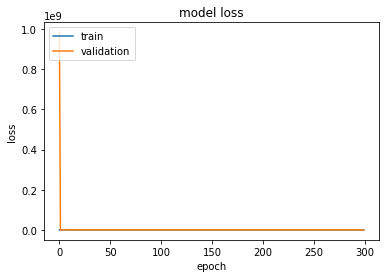

In [12]:
import matplotlib.pyplot as plt 
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

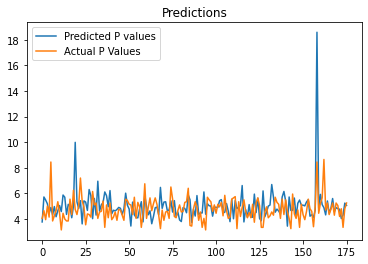

In [13]:

plt.plot(predictions)
plt.plot(y_val)
plt.title('Predictions')
plt.legend(['Predicted P values', 'Actual P Values'], loc='upper left')
plt.show()

In [14]:
dataset[0][1].shape

(300, 300, 3)

In [15]:
dataset[0][2]

5.4

In [16]:
import tensorflow as tf

In [17]:
tf.test.gpu_device_name()

'/device:GPU:0'